<a href="https://colab.research.google.com/github/Kirtiwardhan01/Retail-Analytics---Sales-Prediction-/blob/master/Retail_Analytics_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Retail Analytics**
---



In [0]:
#Let's import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
from warnings import filterwarnings

In [0]:
pd.set_option('display.max_columns',100)

In [4]:
#Reading the files
df_train = pd.read_csv("Train_Retail.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Reading the files
df_test = pd.read_csv("Test_Retail.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#Lets check the shape of both the files
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [7]:
#Let's check for missing values in train dataset
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see there are missing values in Item_Weight and Outlet_Size

In [8]:
#Let's check for missing values in test dataset
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can see there are missing values in Item_Weight and Outlet_Size

In [9]:
#Let's check the dtypes of the columns
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Below are the unique values from categorical columns**

Item_Identifier has 3 unique codes: FD, DR, NC

Item_Fat_Content: Low Fat', 'Regular', 'low fat', 'LF', 'reg

Item_type: Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables','Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods','Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned','Breads', 'Starchy Foods', 'Others', 'Seafood'

Outlet_Identifier: OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019

Outlet_Size: Medium', nan, 'High', 'Small

Outlet_Location: 'Tier 1', 'Tier 3', 'Tier 2'

Outlet_Type: 'Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3'





**Data Preprocessing**

In [10]:
#Descriptivr Stats
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
#Let's fill the Nans with mean value as there's not much difference between mean and median
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)


In [12]:
#Let's deal with Outlet_Size as it's categorical column
print(df_train.Outlet_Size.value_counts())
print(df_test.Outlet_Size.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


If we can see the column has imbalance in the classes and if we fill na with mode value then it further becomes more imbalanced

So let's fill na with High to balance the feature to make the classes balanced

In [0]:
#Filling  NaNs in Outlet_Size column with "High"
df_train['Outlet_Size'].fillna('High',inplace=True)
df_test['Outlet_Size'].fillna('High',inplace=True) 

Let's check for any null values

In [14]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

##### **EDA**

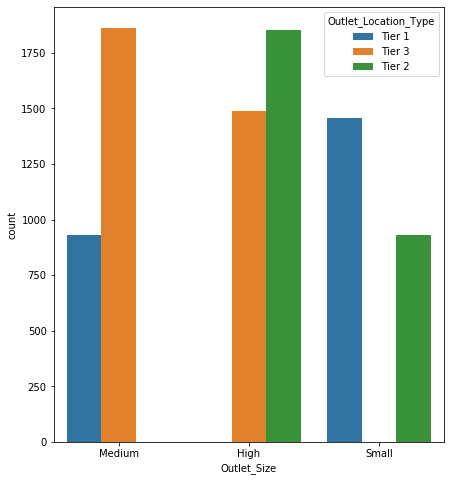

In [16]:
#Let's vizualise data using few plots
#Let's see the count of outlet sizes wrt outlet location type
plt.figure(figsize=(7,8))
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=df_train)

From above plot, we can see that in Tier 1 there's no high size outlet

In Tier 2 there is no medium size outlet and in Tier 3 there is no smaller outlet size


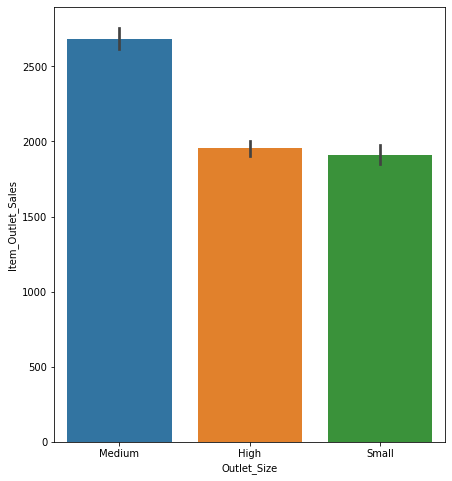

In [17]:
#Let's vizualise data using few plots
#Let's see the how sales vary as per outlet size
plt.figure(figsize=(7,8))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train)

In [18]:
sales_outlet = df_train.Item_Outlet_Sales.groupby(df_train.Outlet_Size).mean()
sales_outlet

Outlet_Size
High      1955.474124
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

From the above we can see the mean sales of smaller and higer size outlets are nearly equal unlike the medium size outlet

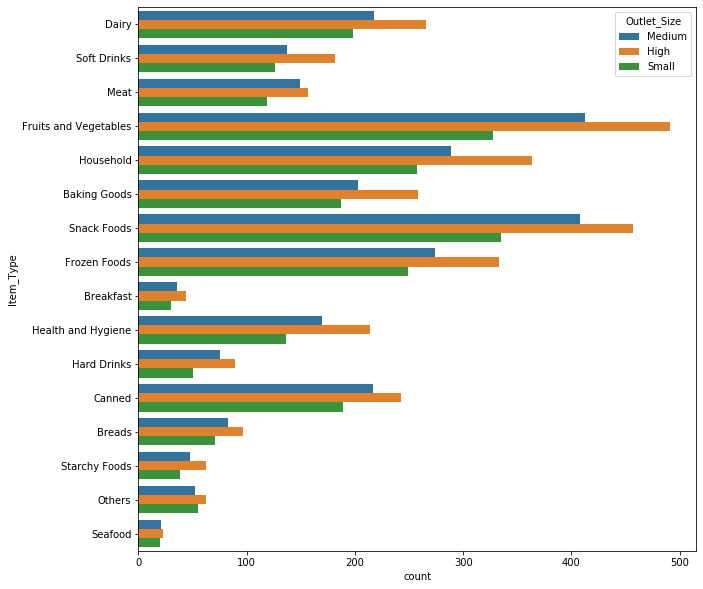

In [19]:
#Let's see the distribution of item types in outlets
plt.figure(figsize=(10,10))
sns.countplot(y='Item_Type',hue='Outlet_Size',data=df_train)

We can see the sales of each item type in 3 different outlets  

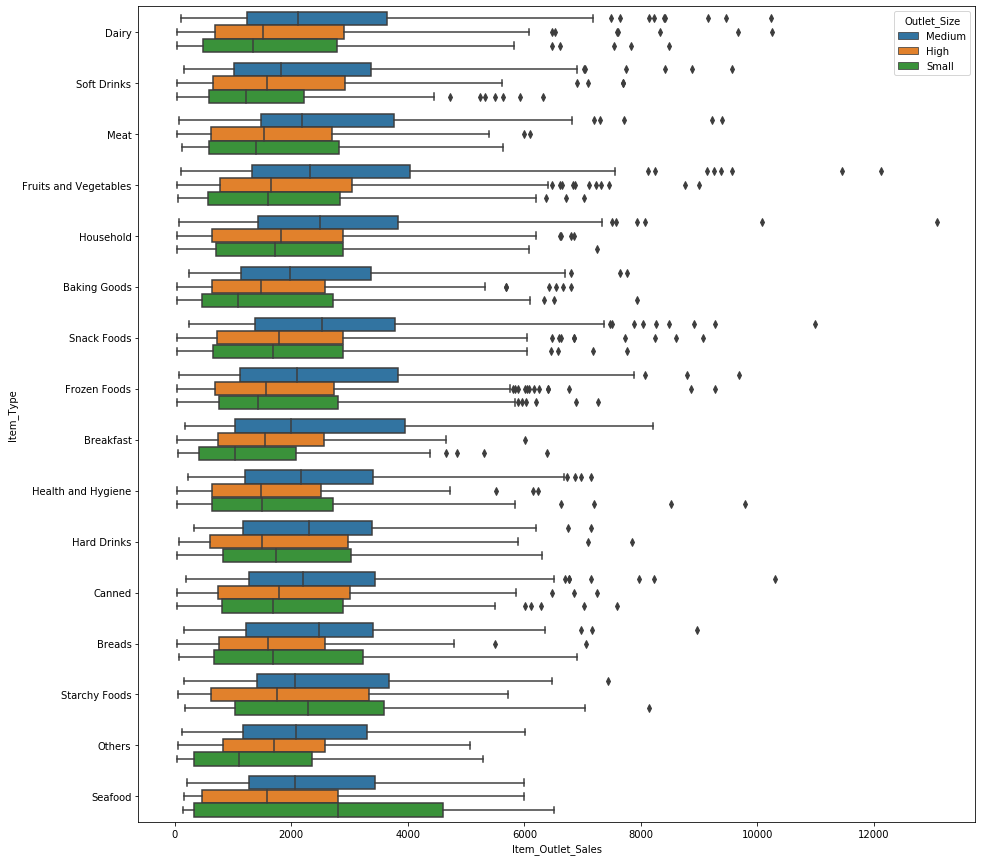

In [20]:
#Checking how each item type's sales across 3 outlet sizes
plt.figure(figsize=(15,15))
sns.boxplot(x='Item_Outlet_Sales',y='Item_Type',hue='Outlet_Size',data=df_train)

From above we can see that the median sales of every item across 3 outlet sizes is varying and there are few outliers

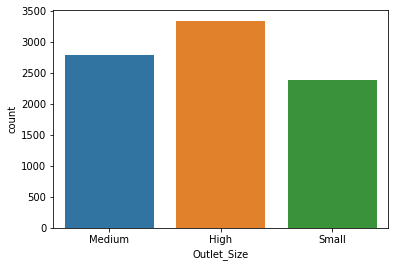

In [21]:
#Let's check the number of outlet sizes and no. of outlet locations
sns.countplot(x='Outlet_Size',data=df_train)

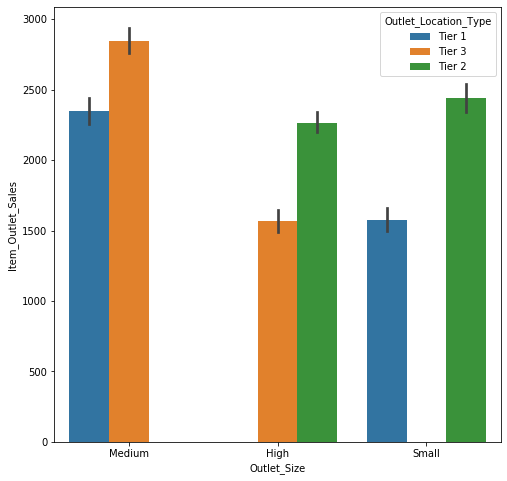

In [22]:
#Let's check the sales wrt to outlet_size and outlet location type
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df_train)

In [23]:
count_outlet_size = df_train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type',columns='Outlet_Size',aggfunc='mean')
count_outlet_size

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,NaN,2348.354635,1576.192909
Tier 2,2266.410119,NaN,2438.841866
Tier 3,1567.588265,2847.959679,NaN


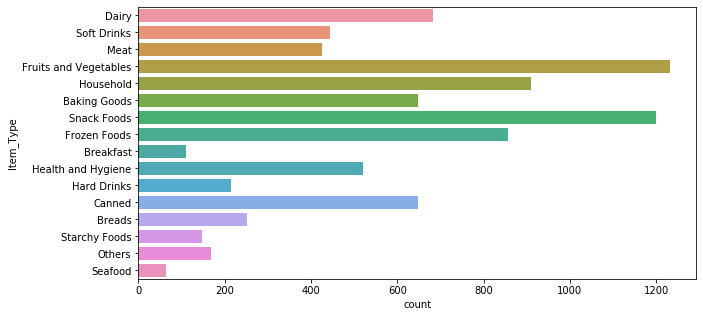

In [24]:
#Let's first see the count of item types anf then will see sales of these item types
plt.figure(figsize=(10,5))
sns.countplot(y='Item_Type',data=df_train)

Fruits & vegetables, snack foods, Households and Frozen foods are bought more number of times 

whereas seafood is bought very less no. of times 


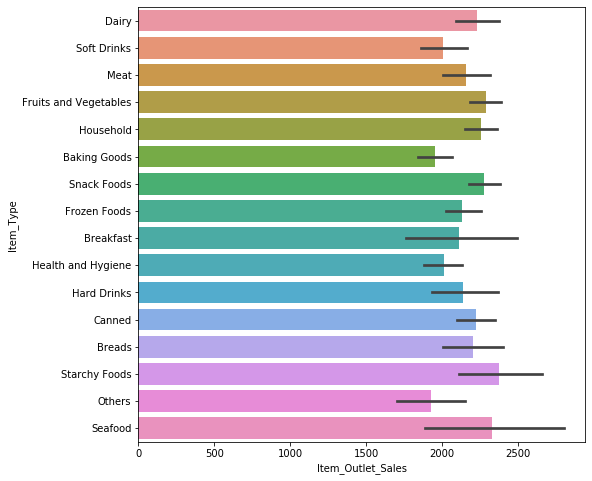

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=df_train,orient='h')

We can see the sales of each item

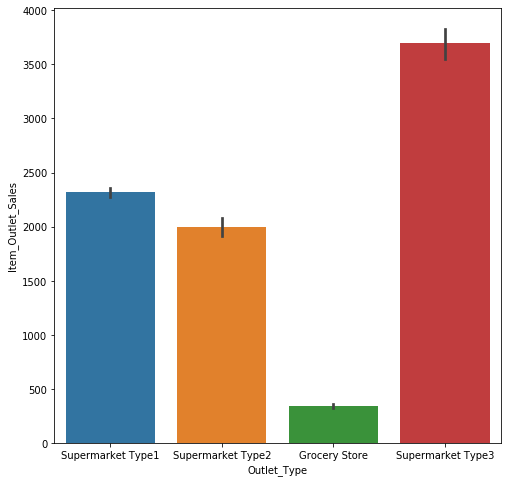

In [26]:
#Let's see the sales wrt to outlet_type
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_train)

In [27]:
outlet_type = df_train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type',aggfunc='mean')
outlet_type

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


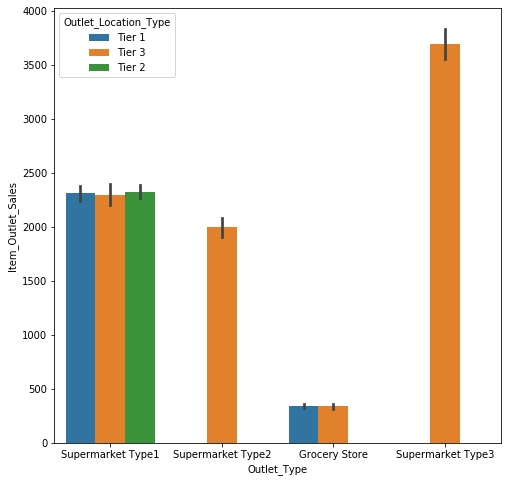

In [28]:
#Let's see the sales wrt to outlet_type
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df_train)

In [29]:
sales_outlet_type = df_train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Location_Type',aggfunc='mean')
sales_outlet_type

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,340.329723,NaN,339.351662
Supermarket Type1,2313.099451,2323.990559,2298.995256
Supermarket Type2,NaN,NaN,1995.498739
Supermarket Type3,NaN,NaN,3694.038558


<Figure size 360x360 with 0 Axes>

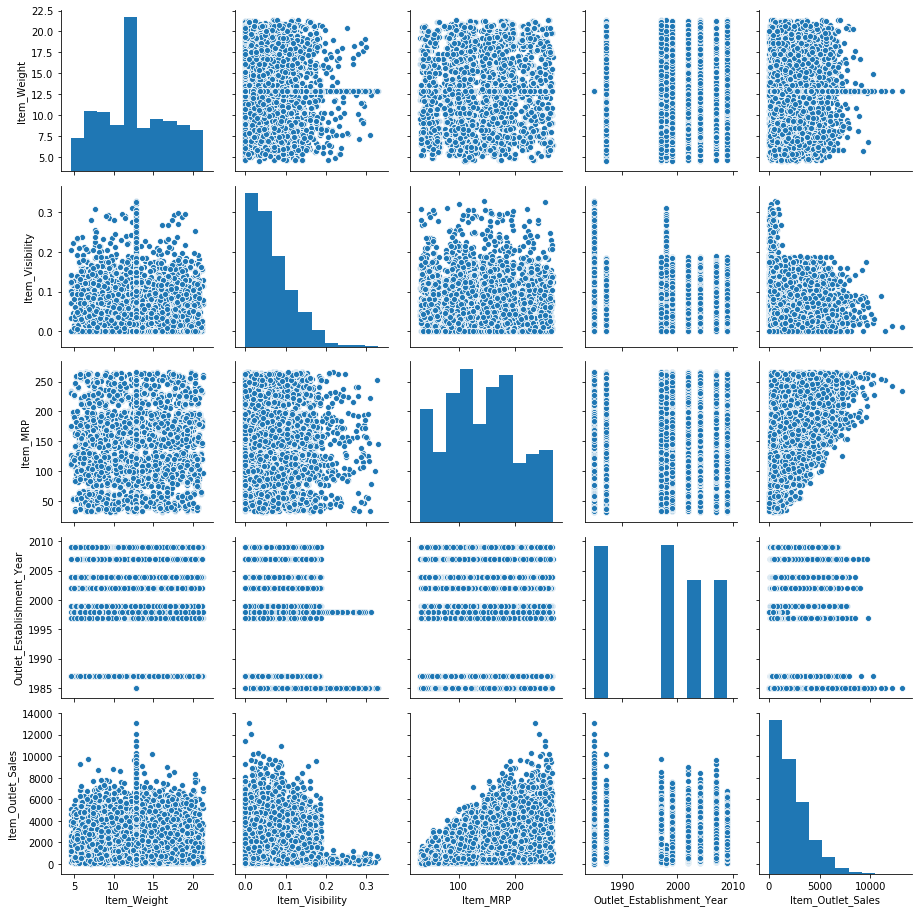

In [30]:
plt.figure(figsize=(5,5))
sns.pairplot(df_train)

There seems to be correlation between MRP and Sales

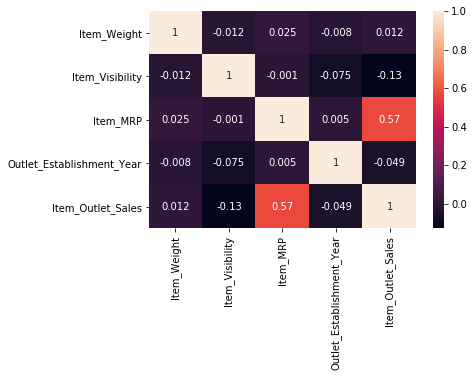

In [31]:
#Let's plot correlation
corr = df_train.corr().round(3) 
sns.heatmap(corr,annot=True)

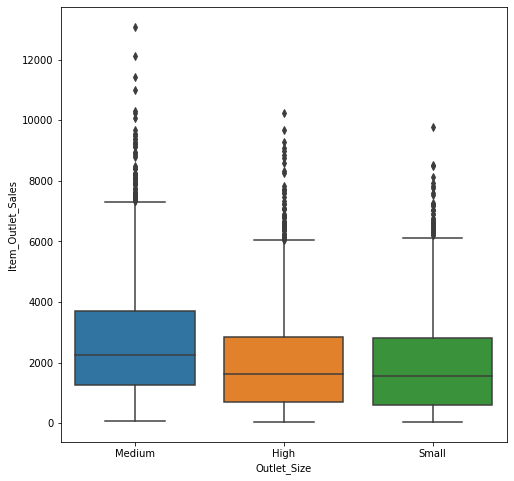

In [32]:
#Let's plot boxplot between Item_Outlet_Sales and Outlet_Size
plt.figure(figsize=(8,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train)

The Median sales of Smaller size and Higher size outlets are nearly equal 

whereas the median sales of medium size outlet is about 2300

In [33]:
median_sales = df_train.Item_Outlet_Sales.groupby(df_train.Outlet_Size).median()
median_sales  

Outlet_Size
High      1637.8680
Medium    2251.0698
Small     1544.6560
Name: Item_Outlet_Sales, dtype: float64

**Feature Engineering**

In [34]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Let's derive Item_Category based on the Item_Identifier.**

If we check the column Item_Identifier keenly we can observe that, Item_Identifier has a code prefixed in it based on the category which they belogns to(FDA15, DRC01, FDX07, NCD19...etc.). Broadly there are three categories of items each of which are identified by FD, DR and NC. Here I'm naming the derived column as Item_Category. 

In [0]:
#So let's extract first 2 letters of the code
df_train['Item_Category'] = df_train['Item_Identifier'].apply(lambda x:x[0:2])

In the above line of code, we are extracting the first 2 letters of the Item Identifier.  <br>
FDA15 --> FD  <br>
DRC01 --> DR  <br>

In [36]:
df_train['Item_Category'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Category, dtype: int64

In [0]:
#Let's do with test dataset
df_test['Item_Category'] = df_test['Item_Identifier'].apply(lambda x:x[0:2])

In [39]:
df_test['Item_Category'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Category, dtype: int64

In [41]:
#Let's look at Item_Fat_Content column and unique values in it
df_train.Item_Fat_Content.unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

From above we can see that 'Low Fat' is represented in 3 ways, also 'Regular' is represented in 2 ways

Let's replace them with single representation

In [42]:
df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

print(df_train.Item_Fat_Content.unique())

['Low Fat' 'Regular']


In [43]:
#Let's do the same way with df_test
df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

print(df_test.Item_Fat_Content.unique())

['Low Fat' 'Regular']


Now we have two types of fat contents for all the items, however we know from the previous steps that we have non-consumable items. Having fat content for those items doesn't make sense. Let's create a new category for them. 

In [0]:
df_train.loc[df_train['Item_Category']=='NC','Item_Fat_Content'] = "Non Edible"

In [0]:
df_test.loc[df_test['Item_Category']=='NC','Item_Fat_Content'] = "Non Edible"

Let's look at the data once

In [48]:
df_train.Item_Fat_Content.unique(), df_test.Item_Fat_Content.unique()

(array(['Low Fat', 'Regular', 'Non Edible'], dtype=object),
 array(['Low Fat', 'Regular', 'Non Edible'], dtype=object))

In [51]:
df_train.head()

# Lets drop the columns which have been feature engineered and have no effect on the model

df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
df_train.shape

(8523, 10)

In [52]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,High,Tier 3,Grocery Store,732.3800,FD
4,8.93,Non Edible,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC


We want to convert **Outlet_Size** column as it is nominal.

In [55]:
df_train.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [0]:
df_train['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

In [0]:
df_test['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

For model building with Sci-kit learn we need to have the variables as numerical values. However,we have few variables with the text columns. We are going to dummify these categorical columns before building network on it.

In [0]:
# All the categorical columns

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Category','Outlet_Type','Item_Type']

In [0]:
# Dataframe of all the categorical columns

categorical_cols=df_train[var_mod]

In [59]:
# Lets convert 'Outlet_Size' to string data type

categorical_cols['Outlet_Size']=categorical_cols['Outlet_Size'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
#Let's check he value_counts of outlest_sixe
df_train.Outlet_Size.value_counts()

2    3342
1    2793
0    2388
Name: Outlet_Size, dtype: int64

In the next step, we will dummify the categorical columns. We will also drop the first column of all the dummied categories.

In [0]:
dummy_encoded_df_train = pd.get_dummies(categorical_cols,drop_first=True)

In [62]:
dummy_encoded_df_train.shape

(8523, 26)

In [63]:
dummy_encoded_df_train.columns

Index(['Item_Fat_Content_Non Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Item_Category_FD',
       'Item_Category_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

Let's check the shape of df_train before merging it with dummy_encoded_df_train 

In [64]:
df_train.shape

(8523, 10)

In [0]:
#Let's merge dummy_encoded_df_train with df_train

onehot_encoded_df_train = pd.concat([df_train,dummy_encoded_df_train],1) 

In [66]:
onehot_encoded_df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category', 'Item_Fat_Content_Non Edible',
       'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Item_Category_FD', 'Item_Category_NC',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')

In [68]:
onehot_encoded_df_train.shape

(8523, 36)

You can see that the number of columns have increased from 10 to 36 after one hot encoding.  <br>
Lets drop the categorical columns now, as we have their dummified columns as well.

In [0]:
drop_categorical_cols = df_train[var_mod]

In [0]:
#Let's drop var_mod from onehot_encoded_df_train
onehot_encoded_df_train.drop(drop_categorical_cols,1,inplace=True)

In [73]:
onehot_encoded_df_train.shape

(8523, 30)

We have dropped 6 categorical columns and brought down the columns to 30.

In [76]:
onehot_encoded_df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Non Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Item_Category_FD',
       'Item_Category_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

### 7. Creating Train and Validation Data   <a id=7>

In this step we are going to create data models that are capable of predicting the Outlet_Sales. Inorder to create these models first we split the given Train dataset into Train and Validation datasets. Train dataset is the one which have the ItemOutlet_Sales values. We will train the model based on these values to validate the Validation dataset values.


In this first we are going to create a basic Linear Regression model.

Let's split the data into training and validation datasets

In [0]:
df_train_y = onehot_encoded_df_train['Item_Outlet_Sales']    #New Label
del onehot_encoded_df_train['Item_Outlet_Sales']
df_train_X = onehot_encoded_df_train            #New training set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y, test_size = 0.3, random_state = 34)


In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5966, 29)
(5966,)
(2557, 29)
(2557,)


Entire dataset has been splitted into Train and Test datasets X_train and X_test respectively. As a first model in creating data models for predicting Item_Outlet_Sales values, I'm going to create a linear regression model.

**Linear Regression Model**

In [80]:
from sklearn import model_selection, metrics                                     # Importing model selection and metrics from sklearn
from sklearn.linear_model import LinearRegression                                # Importing LinearRegression from sklearn

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)                                                   # Fitting the model on X_train and y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coef1 = pd.DataFrame(lin_model.coef_,index=X_train.columns)                       # Create a dataframe of all the columns and their coefficients                   

In [82]:
coef1

,0
Item_Weight,1.092744
Item_Visibility,-227.346704
Item_MRP,15.613674
Item_Fat_Content_Non Edible,-27.671912
Item_Fat_Content_Regular,44.922909
Outlet_Location_Type_Tier 2,91.366403
Outlet_Location_Type_Tier 3,96.826741
Outlet_Size_Medium,168.200448
Outlet_Size_Small,98.862804
Item_Category_FD,-79.411923


#### Intuition from the Co-efficient values:

1.   List item
2.   List item



After looking at the values of Co-efficients, we can see that
1. Each item Sales largely depends upon the Store in which we are selling it. 
2. Location of the outlet influences most of the Item Sales. 

We should clearly keep in mind that all these variables are inter-connected. We can't really identify how much an individual variable effects the Item_Outlet_Sales. Instead we assume that by keeping all the remaining variables fixed, how much a unit change in one variable effects overall Item_Outlet_Sales. 

In [0]:
df_train_predictions = lin_model.predict(X_test) 

In [84]:
# Lets have a look at some of the predictions

df_train_predictions[:8]

array([1502.3819874 , 2358.07785959, 3007.20315835, 1616.74578796,
       1516.17515535, 1286.95623613, 3864.62445649,  972.57562381])

We will evaluate the model performance with the RMSE value for the  model. Let's find the RMSE for linear regression model we built

In [85]:
print("RMSE:",(np.sqrt(metrics.mean_squared_error(y_test, df_train_predictions))))

RMSE: 1113.8559394772599


In [86]:
lin_model.score(X_test,y_test)

0.5701893179179658

In [88]:
print(metrics.r2_score(y_test,df_train_predictions))

0.5701893179179658


--------------------------------------------------------------------

**XGBoost Regressor**

In [89]:
!pip install xgboost                                       # Install XGBoost

In [0]:
from xgboost.sklearn import XGBRegressor                                          # Importing the XGBoost Regressor

In [91]:
xgb = XGBRegressor(n_estimators=100,                                              # Number of trees
                   learning_rate=0.08,                                            # Learning Rate
                   gamma=0,                                                       # Minimum reduction in loss(entropy) to make further branches
                   subsample=0.75,                                                # Subsample ratio of the training instance
                   colsample_bytree=1,                                            # Subsample ratio of columns when constructing each tree
                   max_depth=7)                                                   # Max depth of each learner (Decision Tree)
xgb.fit(X_train.values,y_train.values)                                            # Fit the model  

[10:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [0]:
y_pred = xgb.predict(X_test.values)                                              # Prediction of XGBoost Regressor

In [93]:
print('RMSE \n',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))              # Measuring the error

RMSE 
 1118.6517003922088


In [94]:
print(metrics.r2_score(y_test,y_pred))                                           # Checking the R2 score.

0.5664802086080717


**Observation** : The RMSE of the model has increased slightly from 1113 to 1118.  <br>

Lets use Grid Search to find the best hyperparameters for the XGBoost model.

**XGBoost Regressor with Grid Search CV**

In [0]:
from sklearn.model_selection import GridSearchCV                                  # Importing Grid Search

In [0]:
# param_grid is a dictionary containing different parameters for XGBoost

param_grid = {"max_depth": [3,5,10,15],
              "n_estimators": [50,100,200,300] , 
              "gamma": [0.1, 0.2, 0,3], 
              "learning_rate": [0.08],
              "min_child_weight": [5], 
              "colsample_bytree": [0.8], 
              "subsample": [0.85]} 

In [0]:

# Performing Grid Search on xgb regressor and param_grid parameters

grid_search = GridSearchCV(xgb, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

In [98]:
grid_search.fit(X_train.values,y_train.values)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  2.0min finished


[11:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.08,
                                    max_delta_step=0, max_depth=7,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.75, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.1, 0.2, 0, 3],
                         'learning_rate': [0.08], 'max_dep

Lets make the predictions using the best hyperparameters of XGBoost model.

In [0]:
y_pred = grid_search.predict(X_test.values)

In [100]:
print('RMSE \n',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # Measuring the error

RMSE 
 1072.2426925977763


In [101]:
print(metrics.r2_score(y_test,y_pred))                  # Checking the R2 score.

0.601704550044728


**Observation**: The RMSE of the model has reduced further to 1072 after tuning the XGBoost. 

### **Model Evaluation**

In this phase of the project we're going to evaluate the models that we've built so far.
We will compare the RMSE obtained from different models.

RMSE for Linear Regression - 1113   <br>
RMSE for XGBoost - 1118   <br>
RMSE for XGBoost with GridSearchCV - 1072


XGBoost with GridSearchCV performed the best and we will use it to make predictions from the test data.

Let's glue these Item_Outlet_Sales values to our test dataset and create a csv file.

**Before make predictions on the Test Data, we need to preprocess the data in the same steps as the Train data**

In [103]:
print(df_test.columns)                        
df_test.shape

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Category'],
      dtype='object')


(5681, 12)

In [104]:
print(df_train.columns)
df_train.shape

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')


(8523, 10)

Lets drop some rows so that both the Train and Test have equal size.


In [0]:
df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)

In [0]:
df_train.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [0]:
# Join train and test

DATA = pd.concat([df_train, df_test])

In [0]:
# ALl categorical data

categorical_cols=DATA[var_mod]

In [110]:
# Lets convert 'Outlet_Size' to string data type

categorical_cols['Outlet_Size']=categorical_cols['Outlet_Size'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
# Get dummy values for all categorical data

dummy_encoded_DATA = pd.get_dummies(categorical_cols, drop_first = True)
dummy_encoded_DATA.shape

(14204, 26)

In [112]:
# Merge dummy encoded data with original data

one_hot_encoded_DATA = pd.concat([dummy_encoded_DATA, DATA],1)
one_hot_encoded_DATA.shape

(14204, 35)

In [113]:
# Remove all categorical data as we now have them dummified

one_hot_encoded_DATA.drop(categorical_cols,1,inplace=True)
one_hot_encoded_DATA.shape

(14204, 29)

In [0]:
# Extract the test data

one_hot_encoded_test_data = one_hot_encoded_DATA[-5681:]

In [0]:
# Save it to a numpy array before model prediction

X_test = one_hot_encoded_test_data.values

Lets check the shape one last time before making the predictions.

In [116]:
X_test.shape

(5681, 29)

In [117]:
X_train.shape

(5966, 29)

Make predictions on the test data using XGBoost with GridSearchCV.

In [0]:
y_test_predict=grid_search.predict(X_test)   

In [119]:
y_test_predict.shape

(5681,)

In [0]:
df_test['Item_Outlet_Sales'] = y_test_predict

Now lets create a CSV file with the predicted output.

In [0]:
df_test.to_csv("Retail_Data_Output_File.csv")

In [0]:
from google.colab import files

files.download("Retail_Data_Output_File.csv")